In [1]:
import pandas as pd
import numpy as np
import os
import sys
import tensorflow as tf
import cv2
from tqdm import tqdm
tqdm.pandas()
import urllib.request
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def seed_everything(seed=51):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
seed_everything(seed=51)

In [4]:
target_data = np.load('../data/target_data.npy')
target_data = list(target_data)

In [5]:
def get_words():
    word_url = "http://svnweb.freebsd.org/csrg/share/dict/words?view=co&content-type=text/plain"
    response = urllib.request.urlopen(word_url)
    long_txt = response.read().decode()
    words = long_txt.splitlines()
    return words

In [6]:
words = get_words()

In [7]:
print("Number of downloaded words : {}".format(len(words)) )
print(random.choice(words))
words = [x for x in words if len(x) < 8]
print("Number of short words: {}".format(len(words)) )
print(random.choice(words))

Number of downloaded words : 25487
erect
Number of short words: 14398
vocate


In [8]:
x_coors = list(range(0,128,1))
y_coors = list(range(32,256,1))
font_faces = [0,1,2,3,4,5,6,7,16]
font_scales = [1.5,2.0,2.5]
colors = [(0,0,0),(255,255,255)]
bolds = [1,2,3]

In [9]:
def create_input():
    input_data = []
    for img in tqdm(target_data):
        used_text = random.choice(words)
        x_coor = random.choice(x_coors)
        y_coor = random.choice(y_coors)
        font_face = random.choice(font_faces)
        font_scale = random.choice(font_scales)
        color = random.choice(colors)
        bold = random.choice(bolds)
        
        texted_image =cv2.putText(img=np.copy(img),
                                  text=used_text,
                                  org=(x_coor,y_coor),
                                  fontFace=font_face,
                                  fontScale=font_scale,
                                  color=color,
                                  thickness=bold)
        input_data.append(texted_image)
    np.save('../data/input_data.npy', input_data)
    return input_data

In [10]:
input_data = create_input()

100%|██████████| 25000/25000 [00:03<00:00, 6681.61it/s]


In [11]:
print(len(input_data))

25000


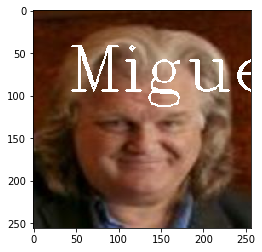

In [12]:
plt.imshow(input_data[0])